<a href="https://colab.research.google.com/github/abhy-kumar/churn-analysis/blob/main/churn3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, roc_auc_score

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Telco_customer_churn.csv')

# Display the first few rows
print(df.head())

   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

In [ ]:
# Convert 'Total Charges' to numeric, handling any non-numeric values
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# After conversion, check for any NaNs introduced
print(df['Total Charges'].isnull().sum())

# Fill or drop NaNs in 'Total Charges'
df['Total Charges'] = df['Total Charges'].fillna(df['Monthly Charges'] * df['Tenure Months'])

# Verify no missing values remain
print(df.isnull().sum())

11
CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


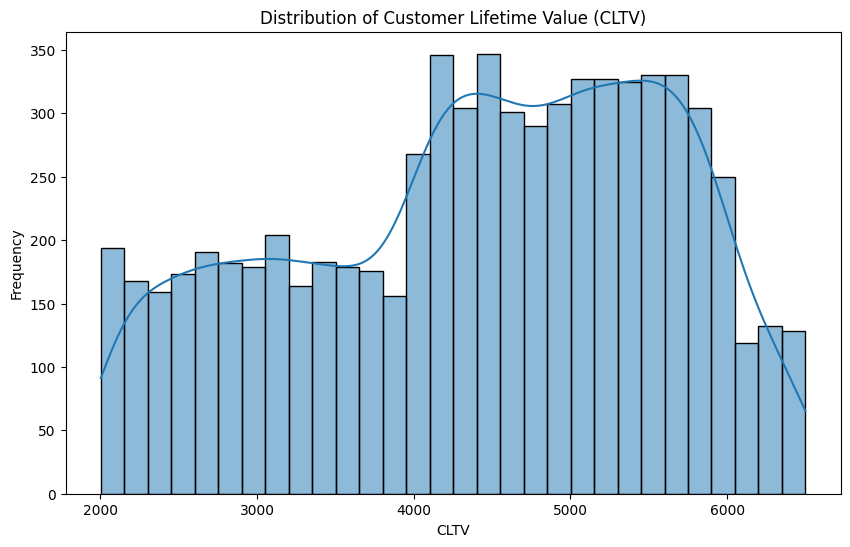

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['CLTV'], kde=True, bins=30)
plt.title('Distribution of Customer Lifetime Value (CLTV)')
plt.xlabel('CLTV')
plt.ylabel('Frequency')
plt.show()

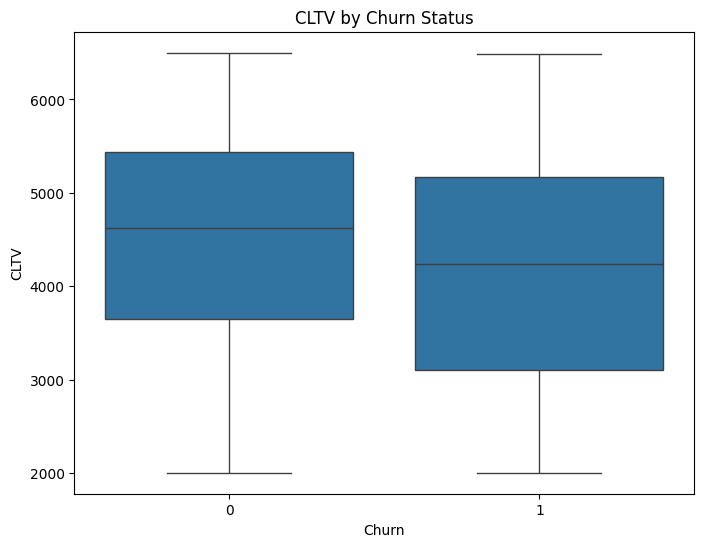

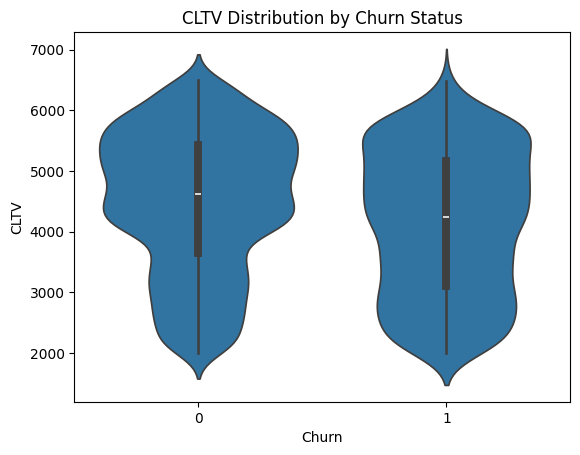

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn Value', y='CLTV', data=df)
plt.title('CLTV by Churn Status')
plt.xlabel('Churn')
plt.ylabel('CLTV')
plt.show()

# Alternatively, using violin plot
sns.violinplot(x='Churn Value', y='CLTV', data=df)
plt.title('CLTV Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('CLTV')
plt.show()

   Churn Value         CLTV
0            0  4490.921337
1            1  4149.414660


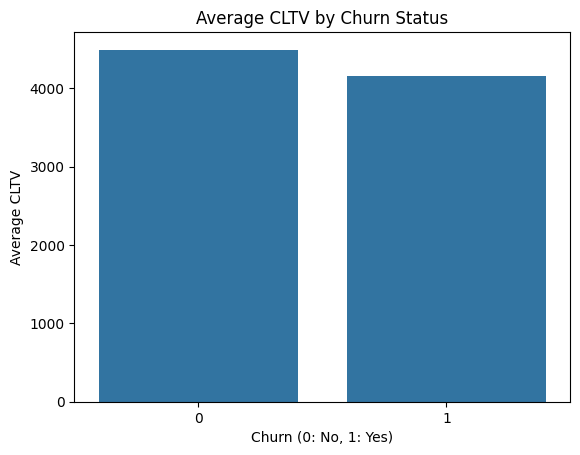

In [ ]:
# Calculate average CLTV for churned vs non-churned customers
cltv_churn = df.groupby('Churn Value')['CLTV'].mean().reset_index()
print(cltv_churn)

# Visualize
sns.barplot(x='Churn Value', y='CLTV', data=cltv_churn)
plt.title('Average CLTV by Churn Status')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Average CLTV')
plt.show()

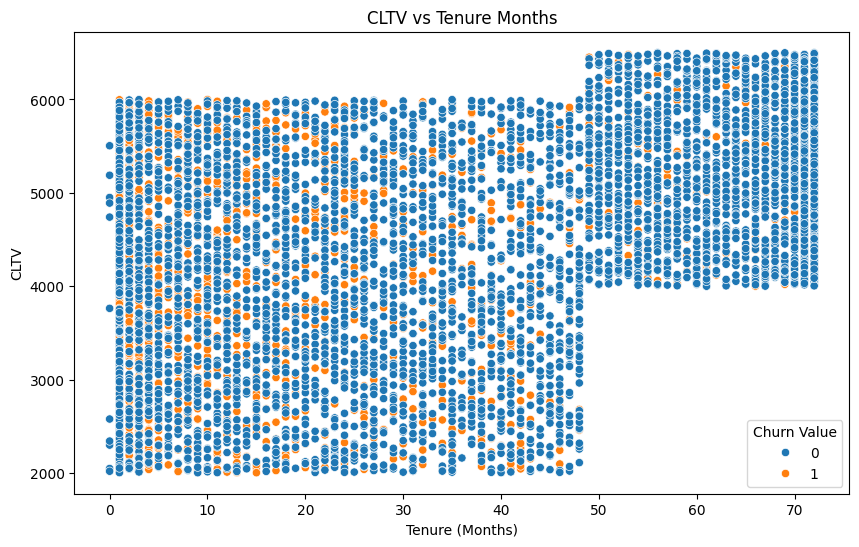

ValueError: Could not interpret value `Internet Service_Fiber optic` for `x`. An entry with this name does not appear in `data`.

In [ ]:
# Scatter plot of CLTV vs Tenure
plt.figure(figsize=(10,6))
sns.scatterplot(x='Tenure Months', y='CLTV', hue='Churn Value', data=df)
plt.title('CLTV vs Tenure Months')
plt.xlabel('Tenure (Months)')
plt.ylabel('CLTV')
plt.show()

# Analyze the impact of Internet Service type on CLTV
sns.boxplot(x='Internet Service_Fiber optic', y='CLTV', data=df)
plt.title('CLTV by Internet Service Type')
plt.xlabel('Fiber Optic Service (0: No, 1: Yes)')
plt.ylabel('CLTV')
plt.show()

In [ ]:
# Define features and target
X = df.drop(['CustomerID', 'CLTV', 'Churn Label', 'Churn Reason'], axis=1)
y = df['CLTV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)